# Spatial Analysis
### A Framework for Unlocking and Linking WWII Japanese American Incarceration Biographical Data
### Creator: Lencia Beltran


In this notebook we explore spatial analysis to visually understand the movement or spaces of how Japanese Americans lived while incarcerated during World War II. Spatial analysis is the process of analyzing patterns and relationships using geographical, topological, and geometric data. 

For this case study, we wanted to know where Japanese Americans, those considered influential figures in the reprisal of January 4, 1944, lived before arriving at Tule Lake, including where and the number of  times they were relocated. For the application and analysis of geospatial data of the Incident Cards, we chose to use two Python libraries, Plotly and Folium. Plotly is a graphing library that offers users the ability to create interactives maps. Folium is an open-source Python library that allows for the visualization and manipulation of spatial data and supports Image, Video, GeoJSON, and TopoJSON overlays (Folium).


#### Creators' Note
The creators of this notebook recognize the records used in this project were created and provided by the US government and therefore do not accurately convey the lives and experiences of the incarcerated Japanese Americans in the WWII US Concentration Camps. We also recognize some information from the federal records might contain personal, sensitive, or damaging information. Our work seeks to respect the privacy of individuals and their families, and approach this time in US history with humility and a willingness to learn.

In [386]:
#install python and python packages if not already installed
! pip install folium
! pip install geocoder
! pip install geopy
! pip instsall json
! pip install geopandas
#! pip install python3

ERROR: unknown command "instsall" - maybe you meant "install"


## Visualizing Spatial Data with Plotly & Folium Python Libraries

First, we pull data from the National Archives "Internal Security Case Reports" Index Cards (also known as Incident Cards). The Index Cards reference narrative reports prepared by camp investigators, police officers, and directors of internal security, relating cases of alleged “disorderly conduct, rioting, seditious behavior,” etc. at each of the 10 camps, with detailed information on the names and addresses in the camps of the persons involved, the time and place where the alleged incident occurred, an account of what happened, and a statement of action taken by the investigating officer. While the cards contain certain information it is not always consistently recorded. To begin working with the Incident Card data a dataframe needs to be created from the imported dataset. 

In [350]:
#import pandas into your notebook
import pandas as pd

#set the option to view your notebook in html format
pd.set_option('display.notebook_repr_html', True)


#import your excel/csv files from the directory they are stored and load the file by using pd.read_excel or pd.read_cv
incidentdf = pd.read_csv('../TL_people_Box8-thru-21_09-21-2021_DATE-CLUSTER - TL_people_Box8 thru 21_08 10 20.csv',dtype=object,na_values=[],keep_default_na=False)
fardf = pd.read_excel('../far_cleanup-09-26-2021.xlsx',dtype=object,na_values=[],keep_default_na=False)
wradf = pd.read_csv('../wra_cleanup-09-26-2021.csv',dtype=object,na_values=[],keep_default_na=False)

For consistency and ease of working with the data we need to make a couple of changes to the three datasets (WRA, FAR, and Incident Cards). First renaming columns and converting the fields to lowercase will help simply searching through and comparing the dataset. For instance, this proves helpful if the data is inconsistent in capitalization. Adding a full name column can be helpful if you are working with data where it's hard to distinguish if the name is a first or last name. 

In [351]:
#for consistency rename Incident Card fields 
incidentdf.rename(columns = {'First Name':'fn', 'Last Name':'ln', 'NAME':'nm', 'OFFENSE':'off', 'NEW-OFFENSE':'noff', 'NEW-DATE':'nd', 'CASE#':'cn', 'Other People':'op'}, inplace = True)

#set the following series to lowercase
incidentdf['off'] = incidentdf['off'].str.casefold().astype('category')
incidentdf['noff'] = incidentdf['noff'].str.casefold().astype('category')
incidentdf['nm'] = incidentdf['nm'].str.casefold().astype('category')
incidentdf['fn'] = incidentdf['fn'].str.casefold().astype('category')
incidentdf['ln'] = incidentdf['ln'].str.casefold().astype('category')
incidentdf['op'] = incidentdf['op'].str.casefold().astype('category') 

In [352]:
#for consistency rename WRA fields
wradf.rename(columns = {'m_camp':'camp', 'NEW-m_lastname':'lastname', 'NEW-m_firstname':'firstname', 'NEW-m_birthyear':'birthyear', 'm_gender':'sex', 'NEW-m_familyno':'familyno', 'm_originalstate':'state', 'm_individualno':'individualno', 'w_assemblycenter':'assemblycenter', 'w_originaladdress':'address'}, inplace = True)

#set the following series to lowercase
wradf['lastname'] = wradf['lastname'].str.casefold()
wradf['firstname'] = wradf['firstname'].str.casefold()
wradf['sex'] = wradf['sex'].str.casefold()
wradf['state'] = wradf['state'].str.casefold()
wradf['address'] = wradf['address'].str.casefold()
wradf['familyno'] = wradf['familyno'].astype(str)
#wradf.drop(columns=['m_lastname'], inplace=True)

#add a full name row
wradf['fullname'] = wradf['firstname'] + ' ' + wradf['lastname']

In [353]:
##for consistency rename FAR fields 
fardf.rename(columns = {'NEW-family_number':'fid', 'NEW-last_name_corrected':'lastname', 'NEW-first_name_corrected':'firstname', 'NEW-other_names':'othern' ,'NEW-type_of_final_departure':'tofd', 'date_of_final_departure':'dofd', 'final_departure_state':'fds', 'camp_address_original':'campaddress', 'camp_address_block':'campaddblock', 'camp_address_barracks':'campaddbarr', 'camp_address_room':'campaddroom'}, inplace = True)

#set the following series to lowercase
fardf['firstname'] = fardf['firstname'].str.casefold()
fardf['lastname'] = fardf['lastname'].str.casefold()
fardf['othern'] = fardf['othern'].str.casefold()
#fardf['sex'] = fardf['sex'].str.casefold()
#fardf['state'] = fardf['state'].str.casefold()
#fardf['address'] = fardf['address'].str.casefold()
fardf['fid'] = fardf['fid'].astype(str)
fardf['dofd'] = fardf['dofd'].astype(str)

#add a full name row
fardf['fullname'] = fardf['firstname'] + ' ' + fardf['lastname']

### Step 1: Category 'riot' Value Count

To get an initial view of the data or search through a dataset to find a specific value, a contains function can be applied and by adding .count at the end of your string will give you the number of times a value appears in a series. The contains function will also allow for the filtering of multiple series by adding a pipe between series. 

In [317]:
#show the number of Incident cards that contain 'riot' in the New Offense series 
noffriot = incidentdf[incidentdf['noff'].str.contains('riot')][['Image#','cn','nd','nm','noff','off', 'Other']]
noffriot.count()

Image#    3872
cn        3872
nd        3872
nm        3872
noff      3872
off       3872
Other     3872
dtype: int64

In [318]:
#show the number of Incident cards that contain 'riot' in the New Offense and Other series 
categoryriot = incidentdf[incidentdf['noff'].str.contains("riot") | incidentdf['Other'].str.contains("riot")][['Image#','off', 'Other']]
categoryriot.count()

Image#    3878
off       3878
Other     3878
dtype: int64

### Step 2: Case Number Search for 'A-7'
Another way to search through inconsistent data is by using regular expressions. This will help capture several variations of data that were transcribed or recorded differently.  

In [188]:
#apply regex will help us find all those variations--WRITE SOMETHING UP & SEND TO GREG FOR CLARIFICATION
case = incidentdf[incidentdf['cn'].str.contains("A[-\s]?7([p,?-p\s-].*)?$", na=False)]
case.head(5)

/opt/conda/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Image#        nd             cn   off  noff DEATH  \
1   Box08-0266.jpg  43-11-04        A7-P138  riot  riot         
2   Box08-0267.jpg  43-11-04  A-7 Page 1465  riot  riot         
14  Box08-0279.jpg  43-11-04       A-7-P284  riot  riot         
20  Box08-0285.jpg  43-11-04   A-7 Page 543  riot  riot         
26  Box08-0291.jpg  43-11-04       A-7-P284  riot  riot         

                     nm ln fn Other Names (known as) Job/Role/Title  \
1                   abe                                               
2                   abe                                               
14    abe, katsumi bill                                               
20  abe, kiyotake (joe)                                               
26             paul abe                                               

            Residence NEW-residence            X            Y  \
1                                                               
2                                                               
14  #47 Block Manager                                           
20             2904-D         29-04  636295.6635  4639016.763   
26  #15 Block Manager                                           

                                            op Age Family / Alien No.  \
1   kazama, tonia / oshita / yamamoto / oshita                          
2                                        henry                          
14                                                                      
20                                                              40562   
26                                                                      

                                                Other Unnamed: 19  
1   Group of men led by Tonia Kazama responsible f...              
2   In letter to Geo. UYEKAWA in Area "B" signed "...              
14                                                                 
20  Prisoner in stockade. Interviewed by J.B. Cook...              
26

### Step 3: Show Names Invovled in the 'riot' 

To view the number of times a value appears in a dataset a values count can be used. For this case study, this will help identify which names were recorded the most under the 'riot' offense series. The number of results displayed can also be restricted by adding a head and the number at the end of the string.  


In [239]:
### filter data to show number of times a name appears in the 'riot' offense column 
riotcount = noffriot['nm'].value_counts()
riotcount.head(30)

kuratomi                 59
kobayashi                40
kai                      36
tom yoshio kobayashi     23
"b" area                 22
kobayashi, tom yoshio    20
tsuda                    20
rev. kai                 19
yamane, tokio            18
tom kobayashi            17
mori                     16
george kuratomi          16
tokio yamane             16
"b" area report          15
tokunaga                 15
kuratomi, george         14
terada, singer           14
kazama, tomio            14
oshita, tomoji           14
kazama                   14
yoshiyama, tom           13
isamu uchida             13
shigenobu murakimi       13
oki, kakuma              12
wada                     11
saito, shu               11
nakao, masaru            11
yamauchi, dr.            11
tetsuo abe               11
oscar itani              11
Name: nm, dtype: int64

### Step 4: Finding Names in the Incident Cards, WRA, & FAR 

To locate the locations within the three datasets the contains function will be used to discover the movements (point of origin, temporary assembly center, concentration camps, and final destination) of the selected names. 

In [270]:
#pick one name--George Kuratomi, show all cards that contain his name in the Incident cards
incidentdf[incidentdf['nm'].str.contains("george kuratomi", na=False)].head(5)

Image#        nd        cn   off  noff DEATH  \
2338  Box10-0217.jpg  43-11-04  A-7-P417  riot  riot         
2366  Box10-0245.jpg  43-11-04  A-7-P139  riot  riot         
2368  Box10-0247.jpg  43-11-04   A-7-P92  riot  riot         
2369  Box10-0248.jpg  43-11-04    A-7P89  riot  riot         
5358  Box12-0840.jpg  43-11-04  A-7-P139  riot  riot         

                      nm        ln      fn Other Names (known as)  \
2338     george kuratomi                                            
2366     george kuratomi                                            
2368     george kuratomi                                            
2369     george kuratomi                                            
5358  george kuratomi -1  kuratomi  george                          

     Job/Role/Title Residence NEW-residence            X            Y  \
2338                                                                    
2366                                                                    
2368                   6605-E         66-05  635285.2772  4638923.446   
2369                                                                    
5358                                                                    

                                                     op Age  \
2338                                                          
2366                                                     30   
2368                                                          
2369                                                          
5358  reverend kai -2, "slim" tsuda - 3, hayashi -4,...       

     Family / Alien No.                                              Other  \
2338                     Note smuggled out on one of prisoners being re...   
2366                     Chairman, Age 30 years, Came from Jerome. List...   
2368                     Youth leader from Jerome - given as possible l...   
2369                     One of names listed on "Approved Segregation C...   
5358                     Kazama gave as his group of representatives, a...   

     Unnamed: 19  
2338              
2366              
2368              
2369              
5358

In [20]:
#we can view additional information in the Other series
incidentdf.iloc[6334,18]

"TAKAHASHI\n\nMentioned during questioning of Geroge Kuratomi on 12/3/43 in connection with Kashima's funeral."

In [24]:
#now let's look at the WRA data for George Kuratomi
wradf[wradf['fullname'].str.contains("george kuratomi", na=False)]

m_dataset                     m_pseudoid      camp m_lastname  \
40133  wra-master  6-jerome_kuratomi_1915_george  6-jerome   KURATOMI   

       lastname m_firstname firstname m_birthyear birthyear sex  ...  \
40133  kuratomi      GEORGE    george        1915      1915   m  ...   

                   w_highestgrade  \
40133  In U.S.: High School 4 [I]   

                                              w_language    w_religion  \
40133  Japanese speak, read (& write), English speak,...  Buddhist [1]   

      w_occupqual1 w_occupqual2 w_occupqual3 w_occuppotn1 w_occuppotn2  \
40133           71          170                        27            6   

      w_filenumber         fullname  
40133       956857  george kuratomi  

[1 rows x 47 columns]

In [240]:
#now let's look at the FAR data for George Kuratomi
fardf[fardf['fullname'].str.contains("kuratomi", na=False)].head(10)

FAR Exit Dataset original_order far_line_id family_number   fid  \
16101         granada1           3820        3713          4091  4091   
16102          jerome1           3856        3811          4091  4091   
16103          jerome1           3857        3812          4091  4091   
16104         granada1           3819        3712          4091  4091   
16105          jerome1           3855        3810          4091  4091   
16106         granada1           3818        3711          4091  4091   
16107          jerome1           3858        3813          4091  4091   
16255          jerome1           3859        3814          4119  4119   
16256        tulelake1          10726       10251          4119  4119   
16257        tulelake1          10727       10252          4119  4119   

      last_name_corrected  lastname last_name_original first_name_corrected  \
16101            Kuratomi  kuratomi           Kuratomi                 Hide   
16102            Kuratomi  kuratomi           Kuratomi                 Hide   
16103            Kuratomi  kuratomi           Kuratomi                Ikuko   
16104            Kuratomi  kuratomi           Kuratomi               Masako   
16105            Kuratomi  kuratomi           Kuratomi               Masako   
16106            Kuratomi  kuratomi           Kuratomi              Rintaro   
16107            Kuratomi  kuratomi           Kuratomi              Rintaro   
16255            Kuratomi  kuratomi           Kuratomi               Toshio   
16256            Kuratomi  kuratomi           Kuratomi                Utako   
16257            Kuratomi  kuratomi           Kuratomi                 Yuri   

      first_name_original  ...             tofd                 dofd fds  \
16101                Hide  ...        Ind-Invit  1944-07-26 00:00:00  CO   
16102                Hide  ...                T  1944-06-19 00:00:00       
16103               Ikuko  ...        Ind-Invit  1944-06-01 00:00:00  IL   
16104              Masako  ...        Ind-Invit  1944-07-26 00:00:00  CO   
16105              Masako  ...                T  1944-06-19 00:00:00       
16106             Rintaro  ...        Ind-Invit  1944-07-26 00:00:00  CO   
16107             Rintaro  ...                T  1944-06-19 00:00:00       
16255              Toshio  ...              T-S  1943-09-26 00:00:00       
16256               Utako  ...  Term-With Grant  1946-01-10 00:00:00  PA   
16257                Yuri  ...  Term-With Grant  1946-01-10 00:00:00  PA   

      campaddress campaddblock campaddbarr campaddroom reference  \
16101                                                              
16102                                                              
16103                                                              
16104                                                              
16105                                                              
16106                                                              
16107                                                              
16255                                                              
16256                                                              
16257                                                              

                     notes          fullname  
16101                          hide kuratomi  
16102                          hide kuratomi  
16103                         ikuko kuratomi  
16104                        masako kuratomi  
16105                        masako kuratomi  
16106                       rintaro kuratomi  
16107                       rintaro kuratomi  
16255                        toshio kuratomi  
16256  (Nee Terada - 1685)    utako kuratomi  
16257                          yuri kuratomi  

[10 rows x 37 columns]

# Creating Maps

After performing the steps above to collect all of the locations the next step is to find the latitude and longitude coordinates. The latitude and longitude coordinates are what allow for geospatial data to be plotted to a map. The coordinates can be found by performing a simple Google search or using geocoder,a Python library that converts addresses to geographic coordinates.

First, install and import the following Python packages and plugins, including the created datasets that are holding the geospatial data. 

In [ ]:
#import packages and plugins
import folium 
from folium import plugins
import ipywidgets

#from geopandas.tools import geocode 
import geopandas as gpd
import geocoder
import geopy
import json
import requests
from branca.element import Template, MacroElement

import pandas as pd
import networkx
import matplotlib.pyplot as plt
import numpy as np
import math
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [25]:
#load files with all of the movements

fullmovedf = pd.read_csv('../python-fullmovements.csv',dtype=object,na_values=[],keep_default_na=False)
fullstackeddf = pd.read_csv('../python-fullmovements-stacked.csv',dtype=object,na_values=[],keep_default_na=False)

#load final departure locations
finallocdf = pd.read_csv('../python-finalloc.csv',dtype=object,na_values=[],keep_default_na=False)

#load Tule Lake Barrack locations 
tulelakelocdf = pd.read_csv('../python-tulelakeloc.csv',dtype=object,na_values=[],keep_default_na=False)

#load first camp locations 
firstlocdf = pd.read_csv('../python-firstloc.csv',dtype=object,na_values=[],keep_default_na=False)

#load temporary assembly locations 
assemblylocdf = pd.read_csv('../python-assemblyloc.csv',dtype=object,na_values=[],keep_default_na=False) 

#load point of origin locations                             
originlocdf = pd.read_csv('../python-originloc.csv',dtype=str,na_values=[],keep_default_na=True)

#load final departure total                           
finalTdf = pd.read_csv('../python-finaltotal.csv',dtype=object,na_values=[],keep_default_na=False)

#load file that shows the number of people arrived at the first camp 
firstcampTdf = pd.read_csv('../python-firstcamptotal.csv',dtype=object,na_values=[],keep_default_na=False)

#load file that shows the number of people arrived at each assembly center 
assemblycampTdf = pd.read_csv('../python-assemblycamptotal.csv',dtype=object,na_values=[],keep_default_na=False)

#load file that shows the number of people located in the same point of origin                               
originTdf = pd.read_csv('../python-origintotal.csv',dtype=object,na_values=[],keep_default_na=False)

totalsdf = pd.read_csv('../python-totals.csv',dtype=object,na_values=[],keep_default_na=False)
totalsdf['total'] = totalsdf['total'].astype(np.int64) #have to change the type for total to integer

#load the file that shows the paths for kuratomi and abe
kpathsdf = pd.read_csv('../python-kuratomi_paths.csv',dtype=str,na_values=[],keep_default_na=False)
apathsdf = pd.read_csv('../python-abepaths.csv',dtype=str,na_values=[],keep_default_na=False)
pathsdf = pd.read_csv('../python-paths.csv',dtype=str,na_values=[],keep_default_na=False)


#load U.S. borders shape file
borders= gpd.read_file('../usborders.json')

### Getting started: Plotly and Folium Maps

For this notebook we explore geospatial functions offered by two Python libraries, Folium and Plotly. Folium is an interactive leaflet map that offers many tiles (or versions) of maps, but for the purpose of this notebook open street maps will primarily be used. Plotly's graphing library is another alternative for viewing spatial data and creating maps. Both Folium and Plotly have many different methods and functions that are not covered in this notebook. 


Note: Plotly's maps are interactive and animated, we faced some challenges displaying them in the Github version of the Jupyter Notebook. The maps below are displayed as an animated gif. To see the bar chart in your own Jupyter Notebook, please follow the Plotly installation instructions https://plotly.com/python/maps/.



### Mapping movements of Individuals using Plotly

To view movements involving a particular individual or group at the Tule Lake Camp, a map containing point locations can be created from a dataframe using px.scatter_geo from Plotly. The following examples use different approaches (points and paths) to view all five movements of Japanese Americans. Additionally, Plotly's px.scatter_geo allows allows for an animation frame to be used to represent a timeline or time lapse to see how the movements for the selected individuals have changed. 


#### Example #1: Point Movements of Kuratomi 
In this example, we view all reported movements involving George Kuratomi, who is considered a leader during the 'riot' at Tule Lake. The timeline at the bottom allows users to select specific frames to see the location of kuratomi during that specific stage of movement. 

In [30]:
#plot points for kuratomi
kuratomi = fullstackeddf[fullstackeddf['Name'].str.contains('kuratomi')]
map1 = px.scatter_geo(kuratomi, lat="lat", lon="long", color="city",
                     hover_name="Name",
                     animation_frame="order",
                     projection="orthographic")
map1.update_layout(height=700, margin={"r":0,"t":0,"l":0,"b":0})
map1.show()

<center><img src="https://cases.umd.edu/user/lenciabeltran/files/lenciabeltran/JAWWII/kuratomi-1.gif?_xsrf=2%7C33b18a8c%7Ceb886ec66f5f5a57bdc49a51b8851249%7C1637626185.gif" width="90%"></center>

#### Example #1.2 Paths of Kuratomi & Abe

An alternative for showing displacement of an individual or group is using paths to trace their movements. The first map shows all five movements for Kuratomi while the second map shows the path for Abe. Paths or line tracing on interactive maps can be achieved using Plotly's .add_trace and go.Scattergo. Additionally, by adding hoverinfo to the code allows for specific information to pop up when users hover over a point. 


#### Example #1.2.1 Paths of Kuratomi 

This first map shows that Kuratomi originated in San Diego, relocated to Santa Anita (assembly center), then was sent to Jerome (incarceration center), relocated to Tule Lake incarceration center, and Kuratomi's final departure state is recorded as Pennsylvania. 

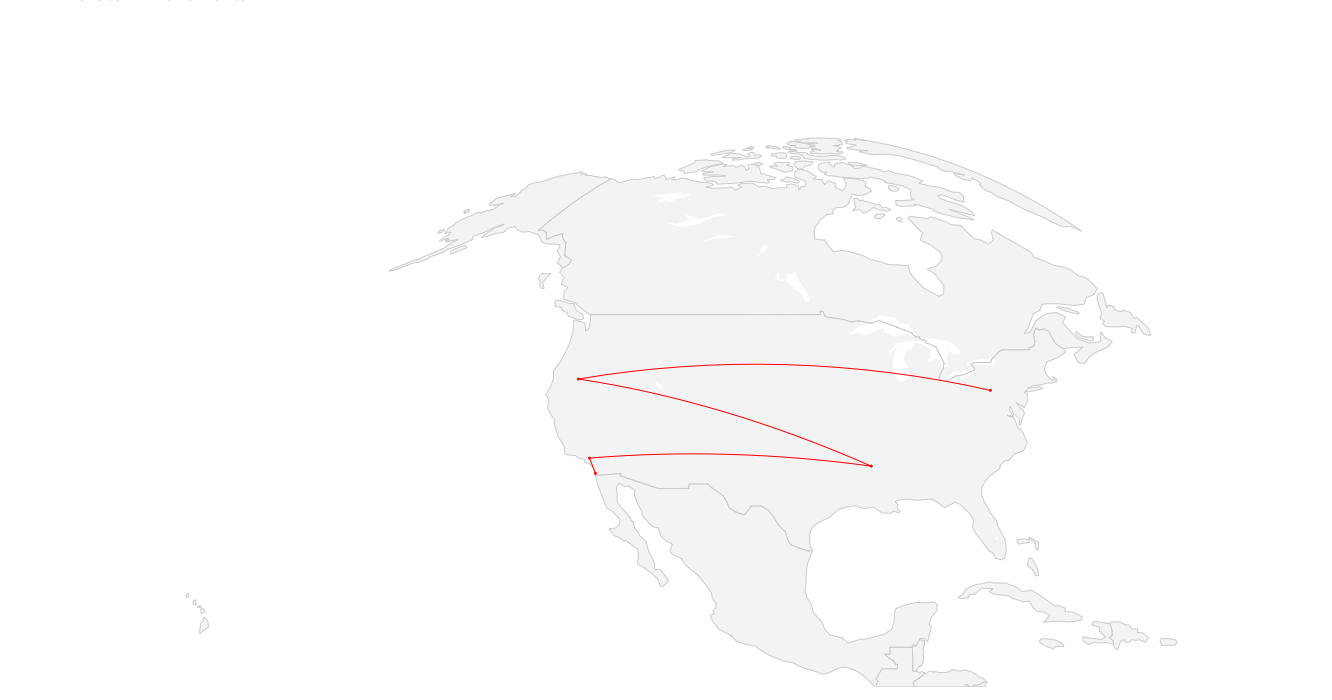

In [21]:
#plot the paths of kuratomi
map2 = go.Figure()

map2.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = kuratomi['long'],
    lat = kuratomi['lat'],
    hoverinfo = 'text',
    text = kuratomi['Name'],
    mode = 'markers',
    marker = dict(
        size = 3,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 2,
            color = 'rgba(68, 68, 68, 0)'    
        )
    )))

kpaths = []
for i in range(len(kpathsdf)):
    map2.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [kpathsdf['startlong'][i], kpathsdf['endlong'][i]],
            lat = [kpathsdf['startlat'][i], kpathsdf['endlat'][i]],
            mode = 'lines',
            line = dict(width = 1,color = 'red'),
            #opacity = float(kpathsdf['dates'][i]) / float(kpathsdf['dates'].max()),
        )
    )

map2.update_layout(
    title_text = 'Kuratomi Movements',
    showlegend = False,
    geo = dict(
        scope = 'north america',
        projection_type = 'orthographic',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

map2.update_layout(height=700, margin={"r":0,"t":0,"l":0,"b":0})
map2.show()

#### Example #1.2.2 Paths of Abe 

This map shows Abe originated in Hawaii, was sent to Sand Island (detention center), relocated sent to Jerome (incarceration center), then sent to Tule Lake incarceration center, and Abe's final departure state is recorded as California. 

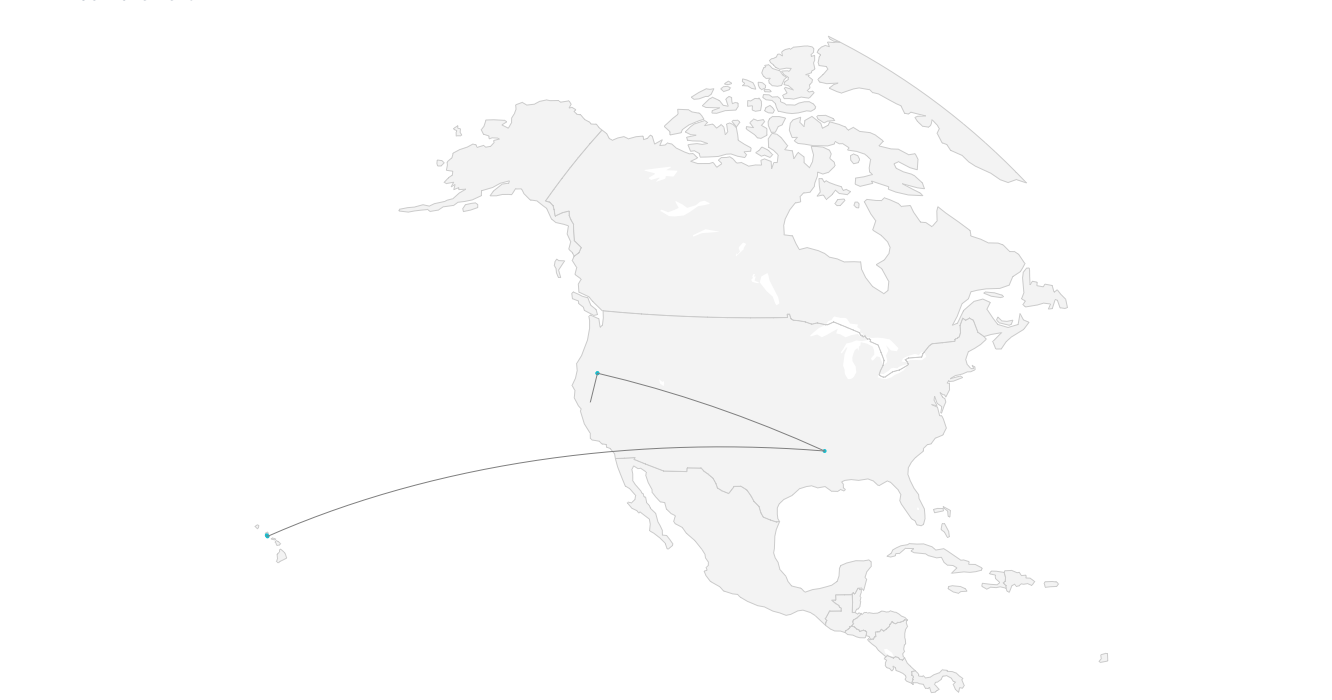

In [20]:
#plot the path of abe
abe = fullstackeddf[fullstackeddf['Name'].str.contains('abe')]

map3 = go.Figure()

map3.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = abe['long'],
    lat = abe['lat'],
    hoverinfo = 'text',
    text = abe['Name'],
    mode = 'markers',
    marker = dict(
        size = 4,
        color = 'rgb(23, 190, 207)',
        line = dict(
            width = 1,
            color = 'rgba(68, 68, 68, 0)'    
        )
    )))

apaths = []
for i in range(len(apathsdf)):
    map3.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [apathsdf['startlong'][i], apathsdf['endlong'][i]],
            lat = [apathsdf['startlat'][i], apathsdf['endlat'][i]],
            mode = 'lines',
            line = dict(width = 1,color = 'gray'),
        )
    )

map3.update_layout(
    title_text = 'Abe Movement',
    showlegend = False,
    geo = dict(
        scope = 'north america',
        projection_type = 'azimuthal equal area',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)
map3.update_layout(height=700, margin={"r":0,"t":0,"l":0,"b":0})
map3.show()

#### Example #1.2.2 Paths of all 25 individuals 

This final map shows the paths and movements for all 25 selected individuals. If you hover over location points you can see that two of the 25 individuals final departure is recorded as Japan.  

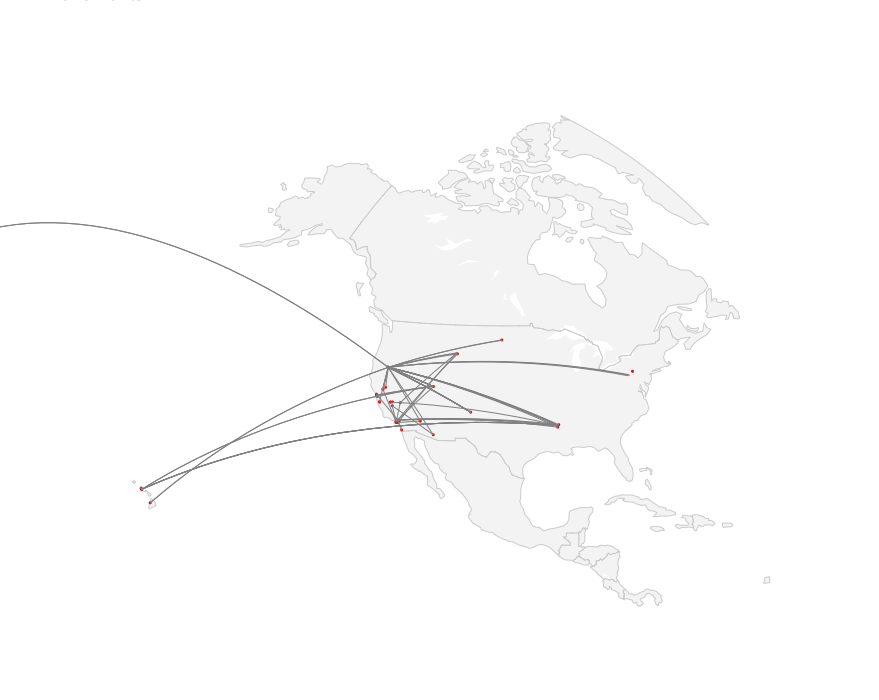

In [27]:
#plot all 25 selected individuals paths
map4 = go.Figure()

map4.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = totalsdf['long'],
    lat = totalsdf['lat'],
    hoverinfo = 'text',
    text = totalsdf['total'],
    mode = 'markers',
    marker = dict(
        size = 3,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 1,
            color = 'rgba(68, 68, 68, 0)'    
        )
    )))

paths = []
for i in range(len(pathsdf)):
    map4.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [pathsdf['startlong'][i], pathsdf['endlong'][i]],
            lat = [pathsdf['startlat'][i], pathsdf['endlat'][i]],
            mode = 'lines',
            line = dict(width = 1,color = 'gray'),
            #opacity = float(kpathsdf['dates'][i]) / float(kpathsdf['dates'].max()),
        )
    )

map4.update_layout(
    title_text = 'movements',
    showlegend = False,
    geo = dict(
        scope = 'north america',
        projection_type = 'azimuthal equal area',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

#increase size
map4.update_layout(height=700, margin={"r":0,"t":0,"l":0,"b":0})
map4.show()

### Example #3: Identifying Sizes & Locations

In this example we use Plotly's px.scatter_geo to display the concentration of individuals at each location and movements in a different format by using animation frame. The animation frame functions similiarly to Folium's overlay in the sense that it allows you to use the bar at the bottom to play the frame or click on the movements you want displayed. 

#### Example #3.1: Identifying Sizes

This map shows the size of individuals at each location for all five movements: point of origin, detention center or assembly center, first incarceration center, relocation to Tule Lake, final departure state. 

In [ ]:
#map concentration of each location 
map5 = px.scatter_geo(totalsdf, lat="lat", lon="long", color="city",
                     hover_name="city", size='total',
                     animation_frame="type",
                     projection="orthographic")
map5.update_layout(height=700, margin={"r":0,"t":0,"l":0,"b":0})
map5.show()

<center><img src="https://cases.umd.edu/user/lenciabeltran/files/lenciabeltran/JAWWII/size-1.gif?_xsrf=2%7C33b18a8c%7Ceb886ec66f5f5a57bdc49a51b8851249%7C1637626185.gif" width="90%"></center>

#### Example #3.2 Identifying Locations 

This map shows where each person is located during the five stages of movements and is an another perspective for viewing and identifying the locations of where each person is at in the timeline.  

In [29]:
maps the order
map6 = px.scatter_geo(fullstackeddf, locationmode='USA-states',
                        lat = 'lat',
                        lon = 'long',
                        hover_name="Name",
                        projection = 'orthographic',
                        color = 'city',
                        opacity = .8,
                        animation_frame="order",
                        )
map6.update_layout(height=700, margin={"r":0,"t":0,"l":0,"b":0})
map6.show()

<center><img src="https://cases.umd.edu/user/lenciabeltran/files/lenciabeltran/JAWWII/locations.gif?_xsrf=2%7C33b18a8c%7Ceb886ec66f5f5a57bdc49a51b8851249%7C1637626185.gif" width="90%"></center>

<center>Fig. 1</center>
<center><img src="https://tile.loc.gov/storage-services/service/pnp/cph/3a30000/3a35000/3a35000/3a35053v.jpg" width='500' alt="A view of the barracks down one of the streets at the Tule Lake Concentration Camp"></center>
<center> An image of Civilian Exclusion Order #5 from the Wartime Civil Control Administration (WCCA) directing the removal of individuals of Japanese ancestry in San Francisco, California. </center>
<center>*Note.* Photograph by Dorthea Lange, photograph, accessed from the Records of the War Relocation Authority at the Library of Congress [2]</center>

### Example #6: Folium, creating overlays and adding geoJSON shapefiles

An alternative method for viewing geospatial data is to create overlays. Creating overlayers or layers allows you to choose which layers are displayed at one time. For this example, we create layers for all five movements (point of origin, temporary assembly centers, first concentration camp, relocation to Tule Lake, and final point of departure). This map also includes geoJSON shape files from [Densho's Site of Shame](https://densho.org/catalyst/sites-of-shame-traces-paths-of-japanese-americans-forced-into-camps-during-wwii/) [1] of exclusion orders that are within the areas that affected the group of Japanese Americans. 

In [15]:
### creating map to show multiple locations with overlays

#create base map
map7 = folium.Map(location=[32.7157, -117.1611], zoom_start=4)


#create a featuregroup 
fg2 = folium.FeatureGroup(name= 'Movements')
map7.add_child(fg2)

#add US state borders to map
usborders= plugins.FeatureGroupSubGroup(fg2, 'U.S. Borders')
map7.add_child(usborders) 

folium.GeoJson(data=borders, style_function=lambda feature: {
    'fillColor': False,
    'color': 'black',
    'weight': '0.5',
    'fill': False,
    'fill_opacity': '1'
}).add_to(usborders)

#create subgroups 
pomap = plugins.FeatureGroupSubGroup(fg2, 'Point of Origin')
map7.add_child(pomap)    
    
for i in originlocdf.itertuples():
    folium.Marker(location=[i.lat, i.long],
                  popup=i.Name,
                  tooltip=i.Name,
                  icon=plugins.BeautifyIcon(number=i.enumno, #use the beautifyIcon to create the numbers on the circle
                                            fill='blue',
                                            border_width=1,
                                            text_color='red',
                                            inner_icon_style='margin-top:0px;')).add_to(pomap)

amap = plugins.FeatureGroupSubGroup(fg2, 'Temporary Assembly Centers')
map7.add_child(amap)    
    
for i in assemblylocdf.itertuples():
    folium.Marker(location=[i.lat, i.long],
                  popup=i.Name,
                  tooltip=i.Name,
                  icon=plugins.BeautifyIcon(number=i.enumno, 
                                            fill='green',
                                            border_width=1,
                                            text_color='red',
                                            inner_icon_style='margin-top:0px;')).add_to(amap)
    
fmap = plugins.FeatureGroupSubGroup(fg2, 'First Camp')
map7.add_child(fmap)    
    
for i in firstlocdf.itertuples():
    folium.Marker(location=[i.lat, i.long],
                  popup=i.Name,
                  tooltip=i.Name,
                  icon=plugins.BeautifyIcon(number=i.enumno,
                                            fill='brown',
                                            border_width=1,
                                            text_color='red',
                                            inner_icon_style='margin-top:0px;')).add_to(fmap)

tlmap = plugins.FeatureGroupSubGroup(fg2, 'Tule Lake')
map7.add_child(tlmap)    
    
for i in tulelakelocdf.itertuples():
    folium.Marker(location=[i.lat, i.long],
                  popup=i.Name,
                  tooltip=i.Name,
                  icon=plugins.BeautifyIcon(number=i.enumno,
                                            fill='lightgreen',
                                            border_width=1,
                                            text_color='red',
                                            inner_icon_style='margin-top:0px;')).add_to(tlmap)


flmap = plugins.FeatureGroupSubGroup(fg2, 'Final Location')
map7.add_child(flmap)    
    
for i in finallocdf.itertuples():
    folium.Marker(location=[i.lat, i.long],
                  popup=i.Name,
                  tooltip=i.Name,
                  icon=plugins.BeautifyIcon(number=i.enumno,
                                            fill='pink',
                                            border_width=1,
                                            text_color='red',
                                            inner_icon_style='margin-top:0px;')).add_to(flmap)

    
#add exclusion orders 
folium.GeoJson('../Exclusion Order 2.geojson', name='Exclusion Order 2').add_to(map7)
folium.GeoJson('../Exclusion Order 2a.geojson', name='Exclusion Order 2a').add_to(map7)
folium.GeoJson('../Exclusion Order 2b.geojson', name='Exclusion Order 2b').add_to(map7)
folium.GeoJson('../Exclusion Order 4.geojson', name='Exclusion Order 4').add_to(map7)
folium.GeoJson('../Exclusion Order 5.geojson', name='Exclusion Order 5').add_to(map7)
folium.GeoJson('../Exclusion Order 6a.geojson', name='Exclusion Order 6a').add_to(map7)
folium.GeoJson('../Exclusion Order 6b.geojson', name='Exclusion Order 6b').add_to(map7)
folium.GeoJson('../Exclusion Order 7.geojson', name='Exclusion Order 7').add_to(map7)
folium.GeoJson('../Exclusion Order 9.geojson', name='Exclusion Order 9').add_to(map7)
folium.GeoJson('../Exclusion Order 10.geojson', name='Exclusion Order 10').add_to(map7)
folium.GeoJson('../Exclusion Order 11.geojson', name='Exclusion Order 11').add_to(map7)
folium.GeoJson('../Exclusion Order 15.geojson', name='Exclusion Order 15').add_to(map7)
folium.GeoJson('../Exclusion Order 19.geojson', name='Exclusion Order 19').add_to(map7)
folium.GeoJson('../Exclusion Order 20.geojson', name='Exclusion Order 20').add_to(map7)
folium.GeoJson('../Exclusion Order 21.geojson', name='Exclusion Order 21').add_to(map7)
folium.GeoJson('../Exclusion Order 22.geojson', name='Exclusion Order 22').add_to(map7)
folium.GeoJson('../Exclusion Order 27.geojson', name='Exclusion Order 27').add_to(map7)
folium.GeoJson('../Exclusion Order 28.geojson', name='Exclusion Order 28').add_to(map7)
folium.GeoJson('../Exclusion Order 29.geojson', name='Exclusion Order 29').add_to(map7)
folium.GeoJson('../Exclusion Order 30.geojson', name='Exclusion Order 30').add_to(map7)
folium.GeoJson('../Exclusion Order 31.geojson', name='Exclusion Order 31').add_to(map7)
folium.GeoJson('../Exclusion Order 32.geojson', name='Exclusion Order 32').add_to(map7)
folium.GeoJson('../Exclusion Order 33.geojson', name='Exclusion Order 33').add_to(map7)
folium.GeoJson('../Exclusion Order 34.geojson', name='Exclusion Order 34').add_to(map7)
folium.GeoJson('../Exclusion Order 48.geojson', name='Exclusion Order 48').add_to(map7)
folium.GeoJson('../Exclusion Order 47.geojson', name='Exlusion Order 47').add_to(map7)
folium.GeoJson('../Exclusion Order 41.geojson', name='Exlusion Order 41').add_to(map7)
folium.GeoJson('../Exclusion Order 42.geojson', name='Exlusion Order 42').add_to(map7)
folium.GeoJson('../Exclusion Order 43.geojson', name='Exlusion Order 43').add_to(map7)
folium.GeoJson('../Exclusion Order 52.geojson', name='Exlusion Order 52').add_to(map7)
folium.GeoJson('../Exclusion Order 54.geojson', name='Exlusion Order 54').add_to(map7)
folium.GeoJson('../Exclusion Order 55.geojson', name='Exlusion Order 55').add_to(map7)
folium.GeoJson('../Exclusion Order 56.geojson', name='Exlusion Order 56').add_to(map7)
folium.GeoJson('../Exclusion Order 60.geojson', name='Exlusion Order 60').add_to(map7)
folium.GeoJson('../Exclusion Order 61.geojson', name='Exlusion Order 61').add_to(map7)
folium.GeoJson('../Exclusion Order 62.geojson', name='Exlusion Order 62').add_to(map7)
folium.GeoJson('../Exclusion Order 63.geojson', name='Exlusion Order 63').add_to(map7)
folium.GeoJson('../Exclusion Order 64.geojson', name='Exlusion Order 64').add_to(map7)
folium.GeoJson('../Exclusion Order 65.geojson', name='Exlusion Order 65').add_to(map7)
folium.GeoJson('../Exclusion Order 66.geojson', name='Exlusion Order 66').add_to(map7)
folium.GeoJson('../Exclusion Order 77.geojson', name='Exlusion Order 77').add_to(map7)
folium.GeoJson('../Exclusion Order 78.geojson', name='Exlusion Order 78').add_to(map7)
folium.GeoJson('../Exclusion Order 81.geojson', name='Exlusion Order 81').add_to(map7)
folium.GeoJson('../Exclusion Order 83.geojson', name='Exlusion Order 83').add_to(map7)
folium.GeoJson('../Exclusion Order 86.geojson', name='Exlusion Order 86').add_to(map7)
folium.GeoJson('../Exclusion Order 92.geojson', name='Exlusion Order 92').add_to(map7)
folium.GeoJson('../Exclusion Order 93.geojson', name='Exlusion Order 93').add_to(map7)
folium.GeoJson('../Exclusion Order 95.geojson', name='Exlusion Order 95').add_to(map7)
folium.GeoJson('../Exclusion Order 96.geojson', name='Exlusion Order 96').add_to(map7)
folium.GeoJson('../Exclusion Order 107.geojson', name='Exlusion Order 107').add_to(map7)
folium.GeoJson('../Exclusion Order 106.geojson', name='Exlusion Order 106').add_to(map7)
folium.GeoJson('../Exclusion Order 105.geojson', name='Exlusion Order 105').add_to(map7)
folium.GeoJson('../Exclusion Order 104.geojson', name='Exlusion Order 104').add_to(map7)
folium.GeoJson('../Exclusion Order 103.geojson', name='Exlusion Order 103').add_to(map7)
folium.GeoJson('../Exclusion Order 102.geojson', name='Exlusion Order 102').add_to(map7)
folium.GeoJson('../Exclusion Order 101.geojson', name='Exlusion Order 101').add_to(map7)

#add a draggable legend 
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:15px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li>1 = Point of Origin</li>
    <li>2 =</span> Temporary Assembly Center</li>
    <li>3 =</span> First Camp</li>
    <li>4 = Tule Lake</li>
    <li>5 = Final Location</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
    .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }

</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

map7.get_root().add_child(macro)



#add layer control to designate the order of the different layers    
layercon = folium.LayerControl().add_to(map7)  


map7

### References

[1] Site of Shame map, Densho Encyclopedia, October, 2020. [Online]. Available: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjulsWh6bP0AhWWqXIEHbqBAUMQFnoECAMQAQ&url=https%3A%2F%2Fmaps.densho.org%2Fsitesofshame%2F&usg=AOvVaw1tHQf3sYac8UH0DARkMzfZ [Accessed: Nov. 25, 2021].

[2] (1942) Civilian exclusion order #5, posted at First and Front streets, directing removal by April 7 of persons of Japanese ancestry, from the first San Francisco section to be affected by evacuation. San Francisco California, 1942. April. [Photograph] Retrieved from the Library of Congress, https://www.loc.gov/item/2001705937/.



